In [500]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h1>Read in the data:</h1>

In [453]:
SHIP1 = "enrichment/W50DF_00092/"
SHIP1_engine1 = "W50DF_00092" + "_01"
ship1_seadevcon_init = pd.read_csv(SHIP1+"W50DF_00092_01_seadevcon.csv") # 0:MDF = Diesel # HFO = Heavy fule oil # Gas
ship1_runlog_init = pd.read_csv(SHIP1+"W50DF_00092_01_runlog.csv")
ships_info = pd.read_csv("enrichment/SeaDevCon_AISdailyaggregates_sanitized.csv", sep=';') # error_bad_lines=False -> entfernt die lines aber, das vielleicht nicht so gut.
tags = pd.read_csv("enrichment/SensorTags_SeaDevCon.csv", sep='\t', header=None)

In [476]:
# Info vom Experten:
# vielleicht ist das gas leer dann muss es zu schweröl umschalten
# wenn die temperatur hoch ist dann können die gastanks nicht mehr so viel gas lagern und dann verbrennen sie es im motor 
# -> mehr power aber vielleicht auch etwas verschwendet.
SHIP = "W50DF_00092"

<h2> Remove 2/3 of the data (min/max values) </h2>

In [477]:
columns = ship1_seadevcon_init.columns.values
remove_tags = []
for colTag in columns:
    if "_max" in colTag or "_min" in colTag: # remove _min or _max
        remove_tags.append(colTag)

print(ship1_seadevcon.shape)
ship1_seadevcon = ship1_seadevcon_init.drop(remove_tags, axis=1)
print(ship1_seadevcon.shape)
print("Removed",len(remove_tags),"features")

(699768, 87)
(699768, 87)
Removed 162 features


<h1>Plot the Tables</h1>

In [478]:
print("Seadevcon:")
print(ships_info.shape)
ship1_seadevcon.head()

Seadevcon:
(4910, 16)


,ts,GVU011PDS01PV,GVU011PT001PV,GVU011PT003PV,GVU011PT005PV,GVU011PT006PV,GVU011TE001PV,SCA011CV161PV,SCA011CV519PV,SCA011CV643PV,...,SCA011TY500PV,SCA011UT7905PV,SCA011WY196-1PV,SOL011A001PV,RunNumber,MinutesSinceStart,mode,CumRunningHours,FuelTypeAnalog,Load
0,NaN,-0.005885,0.02,0.0,8.56,6.29,23.200001,NaN,0.0,NaN,...,70.300003,NaN,0.0,0.0,NaN,NaN,NaN,NaN,MDF,0.0
1,NaN,-0.005850,NaN,NaN,NaN,6.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,not running,0.0,MDF,NaN
2,NaN,-0.005877,0.02,0.0,8.56,6.29,23.200001,NaN,0.0,NaN,...,70.300003,NaN,0.0,0.0,1.0,NaN,not running,0.0,MDF,0.0
3,NaN,-0.005917,NaN,NaN,NaN,6.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,not running,0.0,MDF,NaN
4,NaN,-0.005809,NaN,NaN,NaN,6.29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,not running,0.0,MDF,NaN


In [479]:
ful = ship1_seadevcon['FuelTypeAnalog']
print(ful[608580]) # HFO -> 3 # 424
print(ful[964])    # Gas -> 2 # 340022
print(ful[931])    # GasDiesel -> 1 # 12031
print(ful[20])     # MDF -> 0 # MDF # 347269
# print(len(np.where(ful[:] == "MDF")[0]))

HFO
Gas
GasDiesel
MDF


In [480]:
print("Ship Runlog")
print(ship1_runlog_init.shape)
ship1_runlog_init.head()

Ship Runlog
(2951, 7)


,start,end,duration,mode,RunningHours,RunNumber,CumRunningHours
0,2011-10-18T03:00:00.859Z,2011-10-18T15:11:50.671Z,43909.812,not running,0.00,1.0,0.00
1,2011-10-18T15:11:50.671Z,2011-10-18T15:17:15.656Z,324.985,running,0.09,1.0,0.09
2,2011-10-18T15:17:15.656Z,2011-10-19T02:43:40.859Z,41185.203,not running,0.00,2.0,0.09
3,2011-10-19T02:53:40.781Z,2011-10-21T03:00:00.687Z,173179.906,no data,0.00,2.0,0.09
4,2011-10-21T03:00:00.687Z,2011-10-21T10:37:44.796Z,27464.109,not running,0.00,2.0,0.09


In [481]:
print("AIS daily aggregates")
print(ships_info.shape)
ships_info.head()

AIS daily aggregates
(4910, 16)


,Installation ID,aggregate_date,hours_moving,hours_not_moving,hours_uncertain,completeness,distance_moved,min_speed,max_speed,avg_draught,avg_abs_turn_rate,record_count,last_position_time,last_position_latitude,last_position_longitude,last_speed
0,_00067,01.11.2015,"22,1386",0,0,"0,922442","775,991","18,02","19,36","11,2",0,9,22:28:28,"8,88695","111,532","17,7"
1,_00067,02.11.2015,24,0,0,1,"817,664","18,34","18,5","11,2",0,3,21:35:52,"14,4236","116,045","18,5"
2,_00067,03.11.2015,24,0,0,1,"760,143","15,46","17,46","11,2",0,3,12:55:00,"17,8005","118,805","15,2"
3,_00067,04.11.2015,24,0,0,1,"817,234","17,75","18,75","11,2",0,6,23:54:40,"25,1636","126,953","18,8"
4,_00067,05.11.2015,24,0,0,1,"828,159","18,1",19,"11,2",0,11,23:37:52,"29,9042","133,304","18,6"


In [482]:
print("Sensor Tags")
print(tags.shape)
tags.head()

Sensor Tags
(2669, 4)


,0,1,2,3
0,3,W50_00059_01,BAG011UP01PV,Generator max. active power
1,93,W50_00059_01,SCA011CV124PV,Pilot FO press control
2,94,W50_00059_01,SCA011CV161PV,"Fuel Rack Control, CV161"
3,95,W50_00059_01,SCA011CV432PV,"HT valve position, control value"
4,96,W50_00059_01,SCA011CV493PV,"LT valve position, control value"


In [483]:
columns = list(ship1_seadevcon.columns.values)
for i, colTag in enumerate(columns):
    # print(colTag)
    if "_max" in colTag or "_min" in colTag: # remove _min or _max
        colTag = colTag[:-4]
    if colTag in tags[2].values:
        # row aus tags welche den tag der column enthällt finden:
        a = tags.loc[tags[2] == colTag] # all positions of the tag (for multiple ships different meanings)
        b = a.loc[a[1] == SHIP1_engine1]
        columns[i] = b[3].values[0]
        # print(b[3].values[0])
ship1_seadevcon1 = pd.DataFrame(ship1_seadevcon.values, None, columns) # copies whole dataset into new pd frame. Takes a lot of time.
# print(ship1_seadevcon.columns.values)

In [484]:
ship1_seadevcon = ship1_seadevcon1
#print(ship1_seadevcon.columns.values)

In [485]:
print("RunNumber" in ship1_seadevcon.columns.values) # important for comparison with ship1_runlog

True


<h2>Transform text features into Numerical ones</h2>

In [486]:
for col in ['mode','FuelTypeAnalog']:
    labels, uniques = ship1_seadevcon[col].factorize(na_sentinel=-1)
    lab = pd.DataFrame(labels)
    lab[lab < 0] = 'NaN'
    lab = lab.astype(np.float64)
    ship1_seadevcon[col] = lab

# mode and FuelTypeAnalog are float for now. Will be replaced later by bool and int.

<h2>Remove (2) useless features (>80% NaN values)</h2>

In [487]:
PERCENT_NAN_REMOVE = 0.8 # remove features that have more than 80% NaN values
percent_nan = []
remove_tags = []
for col in ship1_seadevcon:
    ship_df = ship1_seadevcon[col]
    nans = np.sum(ship_df.isnull().values)
    percent_nan.append(nans/ship_df.shape[0])
    if percent_nan[-1] > PERCENT_NAN_REMOVE:
        remove_tags.append(col)
print("Removed: ", remove_tags, "because more than",PERCENT_NAN_REMOVE*100,"% are NaN")
ship1_seadevcon = ship1_seadevcon.drop(remove_tags, axis=1)

Removed:  ['ts', 'SCA011GTY1623PV_C'] because more than 80.0 % are NaN


<h2>Remove Rows where the engine is not running</h2>

In [488]:
#plt.plot(list(range(ship1_seadevcon['mode'].shape[0])), ship1_seadevcon['mode'])
#plt.show()

In [489]:
before = ship1_seadevcon.shape[0]
ship1_seadevcon = ship1_seadevcon[ship1_seadevcon['mode'] != 0.0]
print("Removed",before - ship1_seadevcon.shape[0],"rows.")

Removed 292278 rows.


In [490]:
ship1_seadevcon = ship1_seadevcon.drop('mode', axis=1)
ship1_seadevcon.head()

,"Enclosure underpressure GVU, PDS01",Inlet gas pressure,Gas pressure between shut-off valves,Inert gas pressure,"Instrument air pressure GVU, PT006",Inlet gas temperature,Fuel rack control,Exh WG valve control value,By Pass valve control,"MFI duration offset, cyl A1",...,"CA temp, engine inlet, TE601","Engine exh. gas average temp, TY500","Engine load feedback, torque","Torsional vibration level, mean",Calculated engine load,RunNumber,MinutesSinceStart,CumRunningHours,FuelTypeAnalog,Load
0,-0.00588462,0.02,0,8.56,6.29,23.2,NaN,0,NaN,100,...,43.7,70.3,NaN,0,0,NaN,NaN,NaN,0.0,0
356,NaN,NaN,NaN,NaN,6.295,NaN,51.7833,NaN,NaN,NaN,...,NaN,117.621,1815.55,66.3419,NaN,1,0,-0.000273611,0.0,NaN
357,NaN,NaN,NaN,NaN,6.29,NaN,25.8917,NaN,NaN,NaN,...,46.9,171.7,1831.88,41.9735,NaN,1,2,0.0330597,0.0,NaN
358,NaN,NaN,NaN,NaN,6.29,NaN,0,NaN,NaN,NaN,...,49,142.133,1109.89,146.329,NaN,1,4,0.0663931,0.0,NaN
685,-57.5,NaN,NaN,8.29,6.28,NaN,0,NaN,NaN,NaN,...,NaN,NaN,196.316,NaN,NaN,NaN,NaN,NaN,0.0,NaN


<h2>Interpolate the missing data featurewise</h2>

In [491]:
# Transform to float so interpolate works below (mode and FuelTypeAnalog must be allready factorized)
for col in ship1_seadevcon:
    ship1_seadevcon[col] = ship1_seadevcon[col].astype(np.float64)
ship1_seadevcon = ship1_seadevcon.interpolate(limit=8, limit_direction='both')
ship1_seadevcon.head()

,"Enclosure underpressure GVU, PDS01",Inlet gas pressure,Gas pressure between shut-off valves,Inert gas pressure,"Instrument air pressure GVU, PT006",Inlet gas temperature,Fuel rack control,Exh WG valve control value,By Pass valve control,"MFI duration offset, cyl A1",...,"CA temp, engine inlet, TE601","Engine exh. gas average temp, TY500","Engine load feedback, torque","Torsional vibration level, mean",Calculated engine load,RunNumber,MinutesSinceStart,CumRunningHours,FuelTypeAnalog,Load
0,-0.005885,0.0200,0.0,8.5600,6.290,23.200001,51.783333,0.0,NaN,100.0,...,43.700001,70.300003,1815.545455,0.000000,0.0,1.0,0.0,-0.000274,0.0,0.0
356,-14.379413,0.0175,0.0,8.4925,6.295,23.012501,51.783333,0.0,NaN,100.0,...,45.300000,117.620833,1815.545455,66.341880,0.0,1.0,0.0,-0.000274,0.0,0.0
357,-28.752942,0.0150,0.0,8.4250,6.290,22.825001,25.891667,0.0,NaN,100.0,...,46.900000,171.700000,1831.880342,41.973451,0.0,1.0,2.0,0.033060,0.0,0.0
358,-43.126471,0.0125,0.0,8.3575,6.290,22.637501,0.000000,0.0,NaN,100.0,...,49.000000,142.133333,1109.888889,146.329268,0.0,1.0,4.0,0.066393,0.0,0.0
685,-57.500000,0.0100,0.0,8.2900,6.280,22.450001,0.000000,0.0,0.0,100.0,...,47.960000,127.866667,196.315789,117.063415,0.0,1.1,3.6,0.069143,0.0,0.0


<h2>Replace NaN values with interpolate if there are less than 0.2% NaN</h2>

In [492]:
PERCENT_NAN_REMOVE = 0.002 # remove features that have more than 0.2% NaN values # others replace by interpolation
percent_nan = []
remove_tags = []
for col in ship1_seadevcon:
    ship_df = ship1_seadevcon[col]
    nans = np.sum(ship_df.isnull().values)
    percent_nan.append(nans/ship_df.shape[0])
    if percent_nan[-1] > PERCENT_NAN_REMOVE:
        remove_tags.append(col)
ship1_seadevcon = ship1_seadevcon.drop(remove_tags, axis=1) # remove tags
print("Removed: ", remove_tags, "because more than",PERCENT_NAN_REMOVE*100,"% are NaN")

# interpolate the rest:
ship1_seadevcon = ship1_seadevcon.interpolate()

Removed:  ['Global MFI demand, gas'] because more than 0.2 % are NaN


In [493]:
# Change to usefull dtypes:
# ship1_seadevcon['mode'] = ship1_seadevcon['mode'].astype(np.bool) # removed
ship1_seadevcon['FuelTypeAnalog'] = ship1_seadevcon['FuelTypeAnalog'].astype(np.int8)
ship1_seadevcon['RunNumber'] = ship1_seadevcon['RunNumber'].astype(np.int8)

# plot data in between what head() is printing.
# ship1_seadevcon.iloc[:,30:50]
# ship1_seadevcon.iloc[:,50:70]

In [494]:
print(ship1_seadevcon.shape)

(407490, 83)


<h2>Remove <u>Rows</u> that are still NaN</h2>

In [495]:
# check if columns have NaN values:
remove_tags = []
for col in ship1_seadevcon:
    if ship1_seadevcon[col].isnull().values.any():
        print(col, "still has NaN values and will be removed.")
        remove_tags.append(col)
# remove ->column<-:
# ship1_seadevcon = ship1_seadevcon.drop(remove_tags, axis=1)

By Pass valve control still has NaN values and will be removed.
Fuel demand, pptt still has NaN values and will be removed.


In [496]:
before = ship1_seadevcon.shape

In [497]:
before = ship1_seadevcon.shape
ship1_seadevcon = ship1_seadevcon.dropna(axis=0) # <---------- dropna
print("Removed", (before[0] - ship1_seadevcon.shape[0]), "rows because at least one feature had NaN value")
print("This is", np.round((before[0] - ship1_seadevcon.shape[0])/before[0]*100,2),"% of the whole dataset")

Removed 775 rows because at least one feature had NaN value
This is 0.19 % of the whole dataset


In [501]:
''' Save ship1_seadevcon to file'''
ship1_seadevcon.to_pickle("ship1_seadevcon")

<h1>Inspect Objective</h1>

In [406]:
# Remove outliers from Objective (FuelTypeAnalog):
# ship1_seadevcon = ship1_seadevcon[ship1_seadevcon['FuelTypeAnalog'] < 3] # 3 ist Schweröl. Nicht rausnehmen!
objective = ship1_seadevcon['FuelTypeAnalog']

In [407]:
#print(ship1_seadevcon.columns.values)

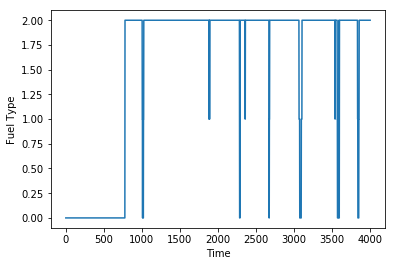

As we can see, sometimes the engin runs with 
Heavy Oil -> 3   (42)
Gas -> 2         (340022)
GasDiesel -> 1   (12031)
Diesel -> 0      (347269)


In [471]:
# Plot an interesting area of Objective
obj = objective[34000:38000]
plt.plot(range(obj.shape[0]), obj)
plt.xlabel("Time")
plt.ylabel("Fuel Type")
plt.show()
print("As we can see, sometimes the engin runs with Diesel instead of Gas. This is expensive.")
print("Heavy Oil -> 3   (42)")
print("Gas -> 2         (340022)")
print("GasDiesel -> 1   (12031)")
print("Diesel -> 0      (347269)")

In [472]:
# TODO: 
# 2. separieren von den loc und speed usw. daten für jedes schiff aus der ships_info tabelle
# 3. Daten aus Seadevcon mittels "run number" einfügen
# 4. Mehr (alle) Motoren hinzufügen!